In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

0. Загрузите датасет для предсказани цены квартиры в зависимости от ряда признаков.

In [ ]:
train = pd.read_csv('/content/train_2.csv', sep = ',')
train

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
0,11809,27,3.0,115.027311,NaN,10.0,4,10.0,2014,0.075424,B,B,11,3097,0,NaN,0,0,B,305018.871089
1,3013,22,1.0,39.832524,23.169223,8.0,7,8.0,1966,0.118537,B,B,30,6207,1,1183.0,1,0,B,177734.553407
2,8215,1,3.0,78.342215,47.671972,10.0,2,17.0,1988,0.025609,B,B,33,5261,0,240.0,3,1,B,282078.720850
3,2352,1,1.0,40.409907,NaN,1.0,10,22.0,1977,0.007122,B,B,1,264,0,NaN,0,1,B,168106.007630
4,13866,94,2.0,64.285067,38.562517,9.0,16,16.0,1972,0.282798,B,B,33,8667,2,NaN,0,6,B,343995.102962
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1260,61,2.0,49.090728,33.272626,6.0,3,12.0,1981,0.300323,B,B,52,10311,6,NaN,1,9,B,119367.455796
9996,16265,27,2.0,64.307684,37.038420,9.0,13,0.0,1977,0.072158,B,B,2,629,1,NaN,0,0,A,199715.148807
9997,2795,178,1.0,29.648057,16.555363,5.0,3,5.0,1958,0.460556,B,B,20,4386,14,NaN,1,5,B,165953.912580
9998,14561,21,1.0,32.330292,22.326870,5.0,3,9.0,1969,0.194489,B,B,47,8004,3,125.0,3,5,B,171842.411855


In [ ]:
train.loc[9163,'HouseYear'] = 2005
train.loc[8828,'HouseYear'] = 2011

1. Постройте круговую диаграмму для признака Rooms, иллюстрирующую количество квартир в процентах в зависимости от количества комнат. Сделайте сектор с наибольшим числом квартир выдвинутым.

In [ ]:
c = train['Rooms'].value_counts()
c

2.0     3880
1.0     3705
3.0     2235
4.0      150
5.0       18
0.0        8
10.0       2
19.0       1
6.0        1
Name: Rooms, dtype: int64

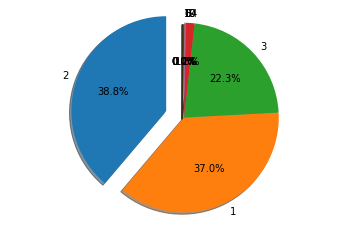

In [ ]:
labels = '2', '1', '3', '4', '5', '0', '10', '19', '6'
sizes = [3880, 3705, 2235, 150, 18, 8, 2, 1, 1]
explode = (0.2, 0, 0, 0, 0, 0, 0 ,0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

plt.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

2. Постройте гистограмму целевой переменной Price. Оцените визуально, по какой цене продаётся наибольшее количество квартир.

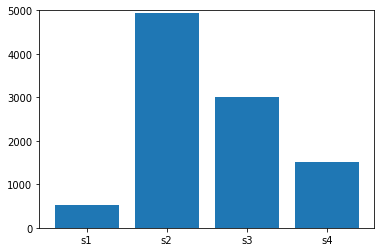

In [ ]:
s1 = (train["Price"][train["Price"]<=100000]).size
s2 = (train["Price"][(train["Price"]<=200000) & (train["Price"]>100000)]).size
s3 = (train["Price"][(train["Price"]<=300000) & (train["Price"]>200000)]).size
s4 = (train["Price"][train["Price"]>300000]).size
sizes = [s1, s2, s3, s4]
labels = ['s1', 's2', 's3', 's4']
#plt.hist(sizes, label = labels)
plt.bar(labels, sizes)
plt.ylim([0,5000])
plt.show()

3. Постройте диаграммы рассеяния для признаков Rooms, Square, HouseFloor, HouseYear в зависимости от целевой переменной Price в одной области fiagure(). Оцените визуально, есть ли среди них такие, на которых разброс точек близок к линейной функции.

<function matplotlib.pyplot.show(*args, **kw)>

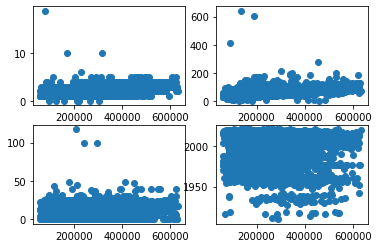

In [ ]:
fig, ax = plt.subplots(2,2)
k1 = train["Rooms"]
k2 = train["Square"]
k3 = train["HouseFloor"]
k4 = train["HouseYear"]
k = train['Price']
ax[0,0].scatter(k, k1)
ax[0,1].scatter(k, k2)
ax[1,0].scatter(k, k3)
ax[1,1].scatter(k, k4)
plt.show

4. Постройте ядерную оценку плотности целевой переменной Price. Оцените визуально, напоминает ли полученный график нормальное распределение. Постройте двумерную ядерную оценку плотности для целевой переменной Price и признака HouseFloor, затем оцените визуально на каких этажах и по какой цене продаётся основная масса квартир.

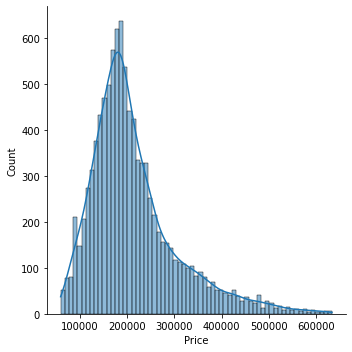

In [ ]:
sns.displot(train["Price"],
            kde = True
            )

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


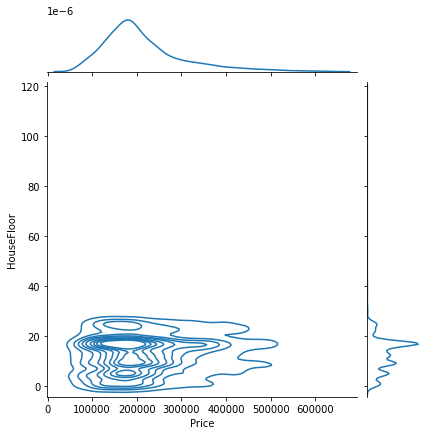

In [ ]:
sns.jointplot(train["Price"], 
            train["HouseFloor"],
            kind = 'kde'
            )

5. Постройте ящиковую диаграмму признака Square. Оцените визуально имеются ли выбросы, и, если да, то начиная с какого размера площади значение признака можно считать выбросом.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


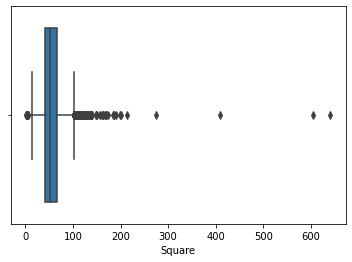

In [ ]:
sns.boxplot(train['Square'])
#Да, выбросы имеются, начиная со 100 - ответ на вопрос

6. При помощи сетки графиков PairGrid визуализируйте попарные отношения признаков Rooms, Square, HouseFloor, HouseYear, Price следующим образом: на диагонали - гистограммы, под диагональю - ядерные оценки плотности, над диагональю - диаграммы рассеяния. По результатам визуализации сделайте выводы (аналогичные п.2,3,4).

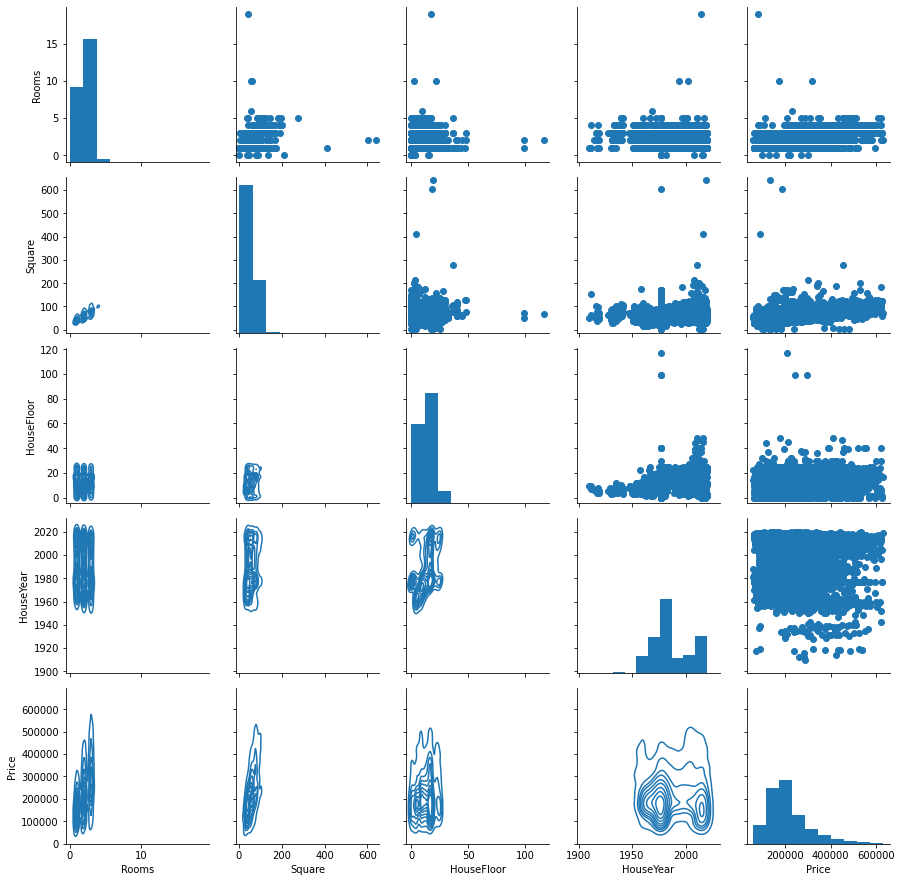

In [ ]:
g = train[['Rooms','Square', 'HouseFloor', 'HouseYear', 'Price']]
pg = sns.PairGrid(g)
pg = pg.map_diag(plt.hist)
pg = pg.map_upper(plt.scatter)
pg = pg.map_lower(sns.kdeplot)


7. Постройте тепловую карту матрицы корреляции (df.corr()) признаков Rooms, Square, HouseFloor, HouseYear, Price. По ней определите, какие признаки являются зависимыми (у таких признаков коэффициент корреляции близок к единице).

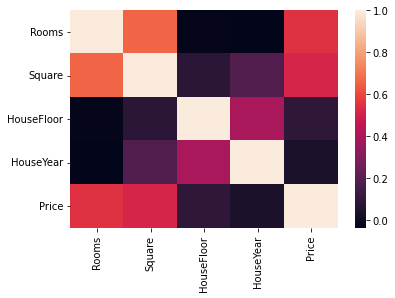

In [ ]:
d = g.corr()
sns.heatmap(d)
#sns.heatmap(g.corr(method = 'pearson'))